<a href="https://colab.research.google.com/github/raghadalmasri/Projects/blob/main/Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Titanic_Trainset.csv")

***Step (1): Split Data to train and test***

In [ ]:
# first of all --> I split data to train and test ,then pass them to function
from sklearn.model_selection import train_test_split

train , test = train_test_split(data , train_size = 0.8 , test_size = 0.2 , random_state=42)

train = train.reset_index(drop= True)
test = test.reset_index(drop= True)

train.shape ,test.shape

((712, 12), (179, 12))

***Step (2) : Create a function to prepare data (train set, test set)***

In [ ]:
def prepare_data(df):
  df = df.copy()
  
  # Create New Features:
  df['Family_size']= df['SibSp'] + df['Parch'] + 1
  df['Title'] = df.Name.str.extract(' ([a-zA-Z]+)\.' , expand=False)

  req_titles = ['Mr', 'Miss', 'Mrs', 'Master']  #Four main titles are finding in all datasets 
  df.loc[~ df['Title'].isin(req_titles) , 'Title'] = 'Others'  # else we are replace title to 'Others'
  
  # Drop Features:
  df.drop(['PassengerId','Name','Ticket','Cabin' ,'SibSp' ,'Parch' ] ,axis=1 , inplace=True)

  # Missing Values
  df['Age'].fillna(value = 29 , inplace=True)
  df['Embarked'].fillna(value = 'S' , inplace=True)
  df['Fare'].fillna(value =32 , inplace =True)

  # Label Encoding
  df.replace({'male':0 , 'female':1} , inplace=True)  
  # OneHet Encoding
  df=pd.get_dummies(df , columns = ['Embarked', 'Title'])


  # Scaling:
  df['Age'] /= 80
  df['Fare'] /= 512
  df['Family_size'] /= 11

  return df

In [ ]:
#Call the function and pass train and test sets

train = prepare_data(train)
test = prepare_data(test)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Family_size,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,1,0,0.56875,0.055664,0.090909,0,0,1,0,0,1,0,0
1,0,2,0,0.28750,0.025391,0.090909,0,0,1,0,0,1,0,0
2,0,3,0,0.40000,0.015479,0.090909,0,0,1,0,0,1,0,0
3,0,3,0,0.32500,0.015340,0.181818,0,0,1,0,0,1,0,0
4,0,3,1,0.07500,0.061084,0.636364,0,0,1,0,1,0,0,0


In [ ]:
#train['Fare'].mean()

***Step (3) :Modeling***


1.   split data to x and y
2.   create and train a model
3.   Evaluate by accuracy

***1.  Split data to x_traIn , y_train , x_test , y_test***

In [ ]:
x_train , y_train , x_test , y_test = train.drop('Survived' , axis=1), train['Survived'],test.drop(['Survived'] ,axis =1) , test['Survived']

In [ ]:
x_train.shape , y_train.shape ,x_test.shape , y_test.shape

((712, 13), (712,), (179, 13), (179,))

***2.  Create and Train a model***

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train , y_train)

LogisticRegression()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors =5 )
knn.fit(x_train , y_train)

SyntaxError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train , y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

svc = SVC()
svc.fit(x_train , y_train)

naiveBayes = GaussianNB()
naiveBayes.fit(x_train , y_train)

perceptron = Perceptron()
perceptron.fit(x_train , y_train)

SGD = SGDClassifier()
SGD.fit(x_train , y_train)

***3.  Evaluating the model using accuracy_score***

In [ ]:
print('Train Score' , SGD.score(x_train , y_train))

Train Score 0.8174157303370787


In [ ]:
train_pred = SGD.predict(x_train)
test_pred = SGD.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Training Accuracy:' , round(accuracy_score(y_train , train_pred),3))  #accuracy_score(orginal , predict)
print('Testing Accuracy:' , round(accuracy_score(y_test , test_pred),3))  #accuracy_score(orginal , predict)


Training Accuracy: 0.817
Testing Accuracy: 0.782


***Step (4):Submission***


1.   read a test.csv file.
2.   call prepare_data function with pass (test.csv).
3.   prediction on test data.
4.   put the result in csv file to submit in kaggle.  



In [ ]:
testsetfile = pd.read_csv('/content/drive/MyDrive/Titanic_Testset.csv')

In [ ]:
testset = prepare_data(testsetfile)

testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


In [ ]:
testset_prediction = model.predict(testset)

In [ ]:
predictions = pd.concat([testsetfile['PassengerId'] , pd.Series(testset_prediction , name= 'Survived')] , axis=1)

predictions.to_csv('/content/drive/MyDrive/predictions.csv' , index= False)

***----------------------------------------------------------------------------------------------------------------------------------------------------------------------***

***----------------------------------------------------------------------------------------------------------------------------------------------------------------------***

***Discover Data -- (shape , head , info , describe)***

In [ ]:
data.shape

(891, 12)

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data.info()

#float64 ----> Numerical/Continous
#int64 ------> Numerical/Discriete
#object -----> Categorial

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.describe(include = 'object')  #(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sandstrom, Miss. Marguerite Rut",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [ ]:
((data['Fare']==0).sum())

15

***Split Data to training and testing set***

In [ ]:
train , test = train_test_split(data , train_size = 0.8 , test_size = 0.2 , random_state=42)

train = train.reset_index(drop= True)
test = test.reset_index(drop= True)

train.shape ,test.shape

((712, 12), (179, 12))


***Feature Engineering -- (Create New Feature , Drop , SCALING ,Missing value ,Encoding)***

In [ ]:
# Create New Features:
# 1
train['Family_size']= train['SibSp'] + train['Parch'] + 1

# 2
train['Title'] = train.Name.str.extract(' ([a-zA-Z]+)\.' , expand=False)
req_titles = ['Mr', 'Miss' , 'Mrs' , 'Master']  #Four main titles are finding in all datasets 
train['Title'] = train['Title'].replace('Mlle' , 'Miss')
train['Title'] = train['Title'].replace('Ms' , 'Miss')
train['Title'] = train['Title'].replace('Mme' , 'Mrs')
train.loc[~ train['Title'].isin(req_titles) , 'Title'] = 'Others'  # else we are replace title to 'Others'

# 3
train['Pclass*Fare'] = train['Pclass'] * train['Fare']

# 4
# train['Fare_groups'] = pd.qcut(train['Fare'] , 5)
# train['Fare_groups'].replace({'(21.045, 39.688]':1, '(10.5, 21.045]':2, '(7.889, 10.5]':3, '(-0.001, 7.889]':4, '(39.688, 512.329]':5} ,inplace = True )

In [ ]:
train.head()

In [ ]:
train.Title.value_counts()

In [ ]:
train.isnull().sum() #  /len(train)

In [ ]:
# Drop Features:

train.drop(['PassengerId','Name','Ticket','Cabin' , 'SibSp' ,'Parch' ] ,axis=1 ,inplace=True)  

In [ ]:
train.shape

(712, 9)

In [ ]:
# Fill Missing value with mean and mod:

train['Age'].fillna(value = train['Age'].mean() , inplace=True) # mean() = 29
# print(train.groupby(['Pclass'])['Age'].median())
# train.loc[( train['Pclass']==1 ) & ( train['Age'].isnull() ) , 'Age']=37
# train.loc[( train['Pclass']==2 ) & ( train['Age'].isnull() ) , 'Age']=29
# train.loc[( train['Pclass']==1 ) & ( train['Age'].isnull() ) , 'Age']=25

train['Embarked'].fillna(value = train['Embarked'].mode()[0] , inplace=True)  # mod()[0] for choose one value of series /list

In [ ]:
train.isnull().sum()

In [ ]:
train['Age'].max()  , train['Fare'].max() , train['Family_size'].max() #take this values for put it in def function (as constant value)

In [ ]:
# Scaling values using DIVID BY MAX VALUE:

train['Age'] /=train['Age'].max()
train['Fare'] /= train['Fare'].max()
train['Family_size'] /= train['Family_size'].max()


In [ ]:
train.Pclass.unique() , train.Embarked.unique()

(array([1, 2, 3]), array(['S', 'C', 'Q'], dtype=object))

In [ ]:
# Label Encoding
train.replace({'male':0 , 'female':1} , inplace=True)

#OneHet Encoding
# train.replace({'S':0, 'C':1, 'Q':2} , inplace=True)
train=pd.get_dummies(train , columns = ['Embarked' , 'Title'])

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_size,Pclass*Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,332,0,1,"Partner, Mr. Austen",0,0.568750,0,0,113043,0.055628,C124,0.090909,28.5000,0,0,1,0,0,1,0,0
1,734,0,2,"Berriman, Mr. William John",0,0.287500,0,0,28425,0.025374,NaN,0.090909,26.0000,0,0,1,0,0,1,0,0
2,383,0,3,"Tikkanen, Mr. Juho",0,0.400000,0,0,STON/O 2. 3101293,0.015469,NaN,0.090909,23.7750,0,0,1,0,0,1,0,0
3,705,0,3,"Hansen, Mr. Henrik Juul",0,0.325000,1,0,350025,0.015330,NaN,0.181818,23.5626,0,0,1,0,0,1,0,0
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",1,0.075000,4,2,347082,0.061045,NaN,0.636364,93.8250,0,0,1,0,1,0,0,0
5,119,0,1,"Baxter, Mr. Quigg Edmond",0,0.300000,0,1,PC 17558,0.483128,B58 B60,0.181818,247.5208,1,0,0,0,0,1,0,0
6,537,0,1,"Butt, Major. Archibald Willingham",0,0.562500,0,0,113050,0.051822,B38,0.090909,26.5500,0,0,1,0,0,0,0,1
7,362,0,2,"del Carlo, Mr. Sebastiano",0,0.362500,1,0,SC/PARIS 2167,0.054107,NaN,0.181818,55.4416,1,0,0,0,0,1,0,0
8,30,0,3,"Todoroff, Mr. Lalio",0,0.368736,0,0,349216,0.015412,NaN,0.090909,23.6874,0,0,1,0,0,1,0,0
9,56,1,1,"Woolner, Mr. Hugh",0,0.368736,0,0,19947,0.069291,C52,0.090909,35.5000,0,0,1,0,0,1,0,0


In [ ]:
# choose mean of 'Age' to put on all Missing value in train and test set
train['Age'].mean()

29.498846153846166

***Visualization  (( befor scaling and incoding step))***

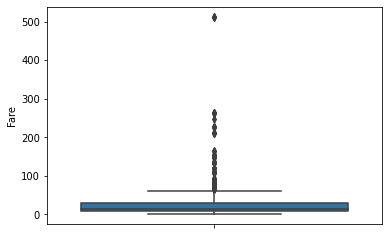

In [ ]:
import seaborn as sns

sns.boxplot(y=train[ 'Fare'])

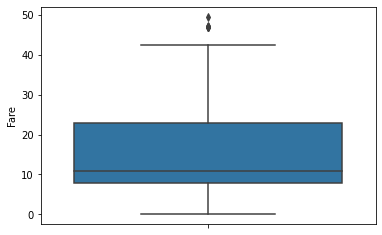

In [ ]:
sns.boxplot(y = train.loc[train['Fare']<50 , 'Fare'])   # Focuse on values less than (50)

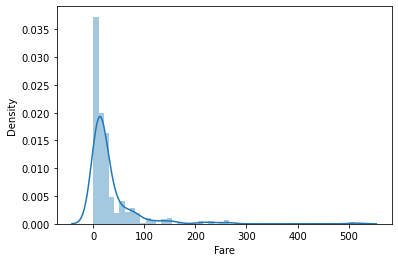

In [ ]:
sns.distplot(train['Fare'])

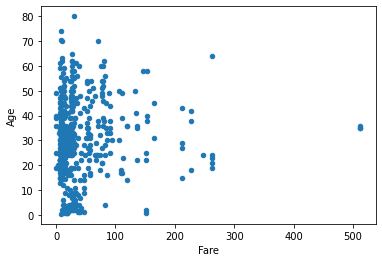

In [ ]:
train.plot(kind="scatter", x="Fare", y="Age")


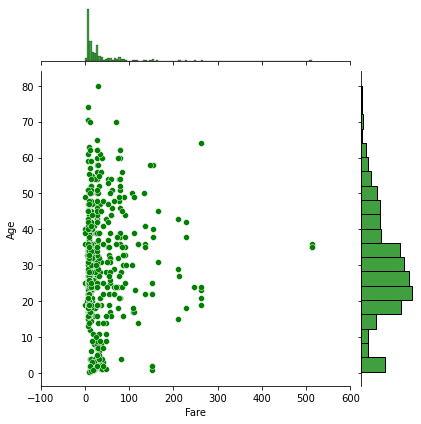

In [ ]:
sns.jointplot(data=train , x='Fare' , y='Age' ,xlim=[-100,600] ,color='g')


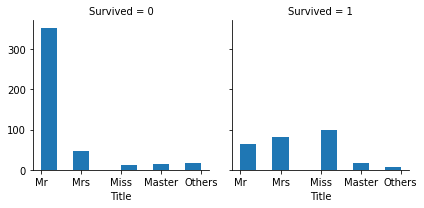

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt

facetgrid=sns.FacetGrid(data=train ,col='Survived' ,height=3 ,aspect=1 )
facetgrid.map(plt.hist ,'Title')

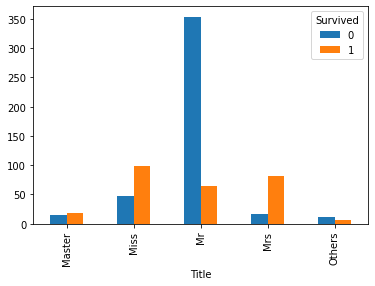

In [ ]:
pd.crosstab(train['Title'],train['Survived']).plot(kind = 'bar' , stacked=False)

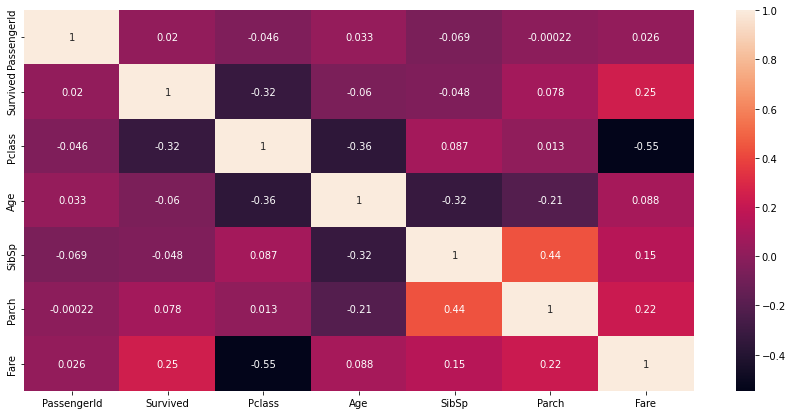

In [ ]:
plt.figure(figsize=(15,7))
corr = train.corr()
sns.heatmap(corr  , annot = True)

***Create a Function to prepare train and test data in the same way***

***Pass Train and Test set to the Function***

***Modeling***

***Submission***